# Basic Dataset Overview

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('../data/processed/qm9_mordred_clean.csv')

In [22]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# --- 1. Dataset Overview ---
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes.value_counts())
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False).head(10))
print("\nBasic stats:")
display(df.describe())

Dataset Shape: (128757, 36)

Data Types:
float64    23
int64      12
object      1
Name: count, dtype: int64

Missing values per column:
smiles      0
mu          0
nHetero     0
GATS1c      0
GATS2c      0
nBonds      0
nBondsO     0
nBondsS     0
nBondsM     0
nBondsKD    0
dtype: int64

Basic stats:


,mu,HOMO,LUMO,alpha,gap,RadiusOfGyration,Asphericity,Eccentricity,PMI1,PMI2,...,nBondsM,nBondsKD,C1SP1,C2SP1,C1SP2,C2SP2,C1SP3,C2SP3,HybRatio,FCSP3
count,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,1.287570e+05,128757.000000,...,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000
mean,2.681969,-0.240380,0.011794,75.277929,0.252174,1.968345,0.333208,0.925018,1.344453e+02,341.082160,...,1.928447,1.061255,0.243412,0.189955,0.546339,0.547962,1.411807,1.883758,0.744018,0.691975
std,1.506153,0.021974,0.046828,8.188153,0.047062,0.224401,0.168311,0.061573,4.097083e+01,120.382705,...,2.104009,1.008537,0.478759,0.537021,0.783356,0.914445,1.094262,1.430424,0.281927,0.276025
min,0.000000,-0.428600,-0.175000,13.210000,0.024600,0.000000,0.000000,0.000000,-3.289165e-16,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.584700,-0.252800,-0.023200,70.459999,0.217100,1.823747,0.206356,0.896568,1.056483e+02,259.262265,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.600000,0.500000
50%,2.485900,-0.241300,0.012700,75.610001,0.250300,1.942305,0.309442,0.940772,1.333897e+02,315.883733,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.833333,0.750000
75%,3.604800,-0.229200,0.050500,80.620003,0.289400,2.080096,0.440719,0.969591,1.614037e+02,394.779666,...,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.857143
max,29.556400,-0.101700,0.193500,196.619995,0.622100,3.418685,1.000000,1.000000,3.258132e+02,1286.724957,...,10.000000,4.000000,4.000000,7.000000,6.000000,8.000000,6.000000,9.000000,1.000000,1.000000


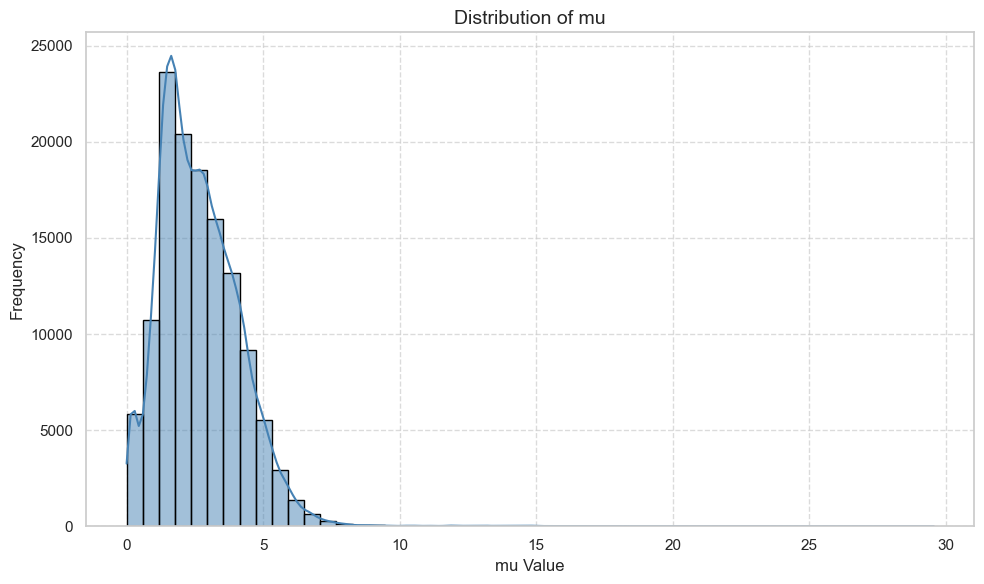

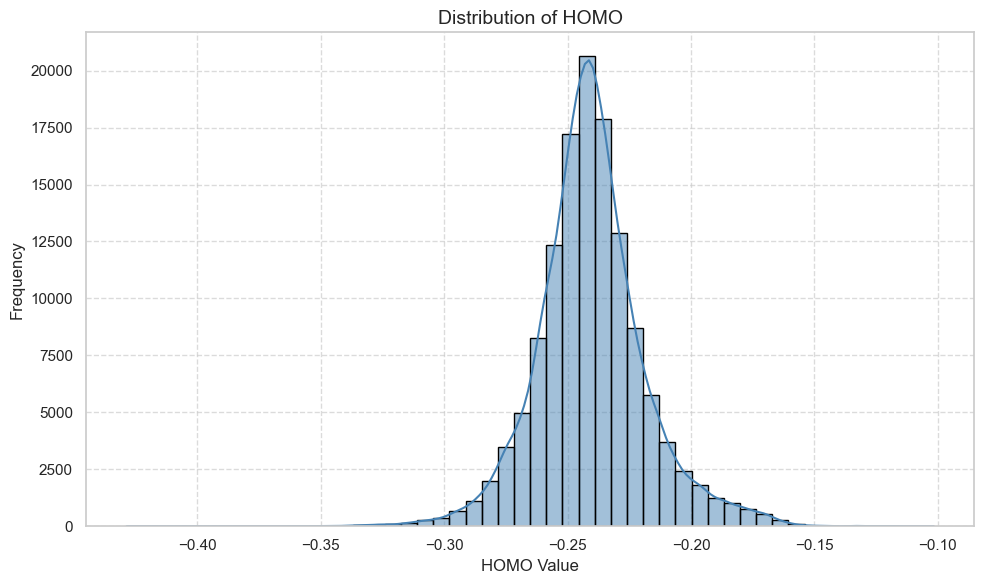

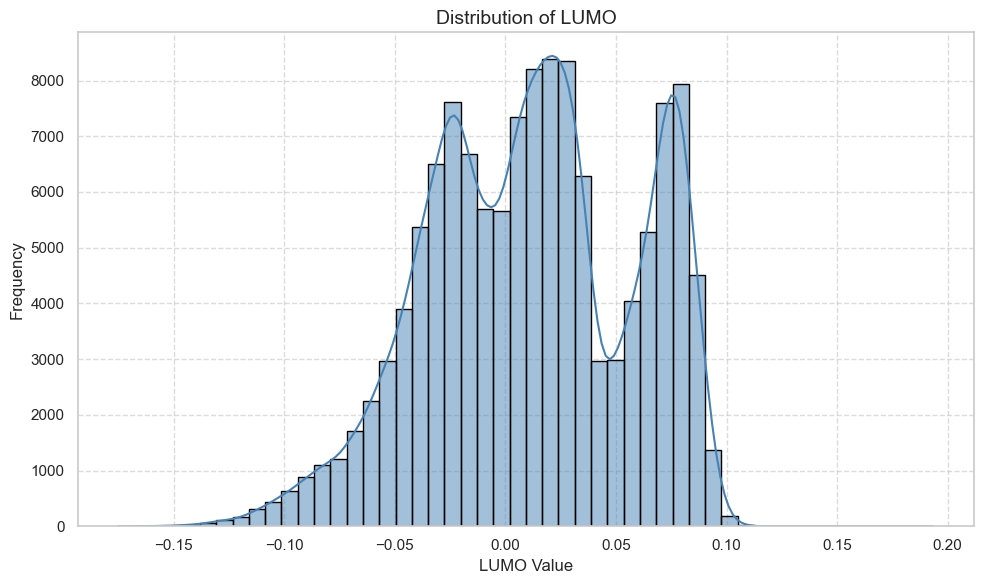

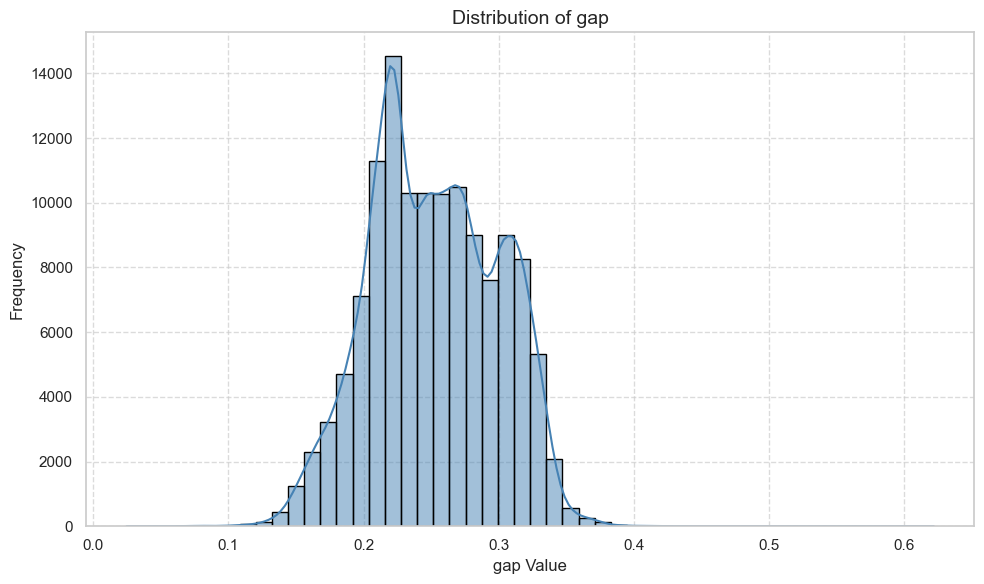

In [31]:
output_dir = "../results/plots"

# --- 2. Target Variable Analysis ---
# Define targets
targets = ["mu", "HOMO", "LUMO", "gap"]


# Histograms + KDE for targets
for col in targets:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=50, color="steelblue", edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(f"{col} Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/hist_{col}.png", dpi=300)
    plt.show()
    plt.close()

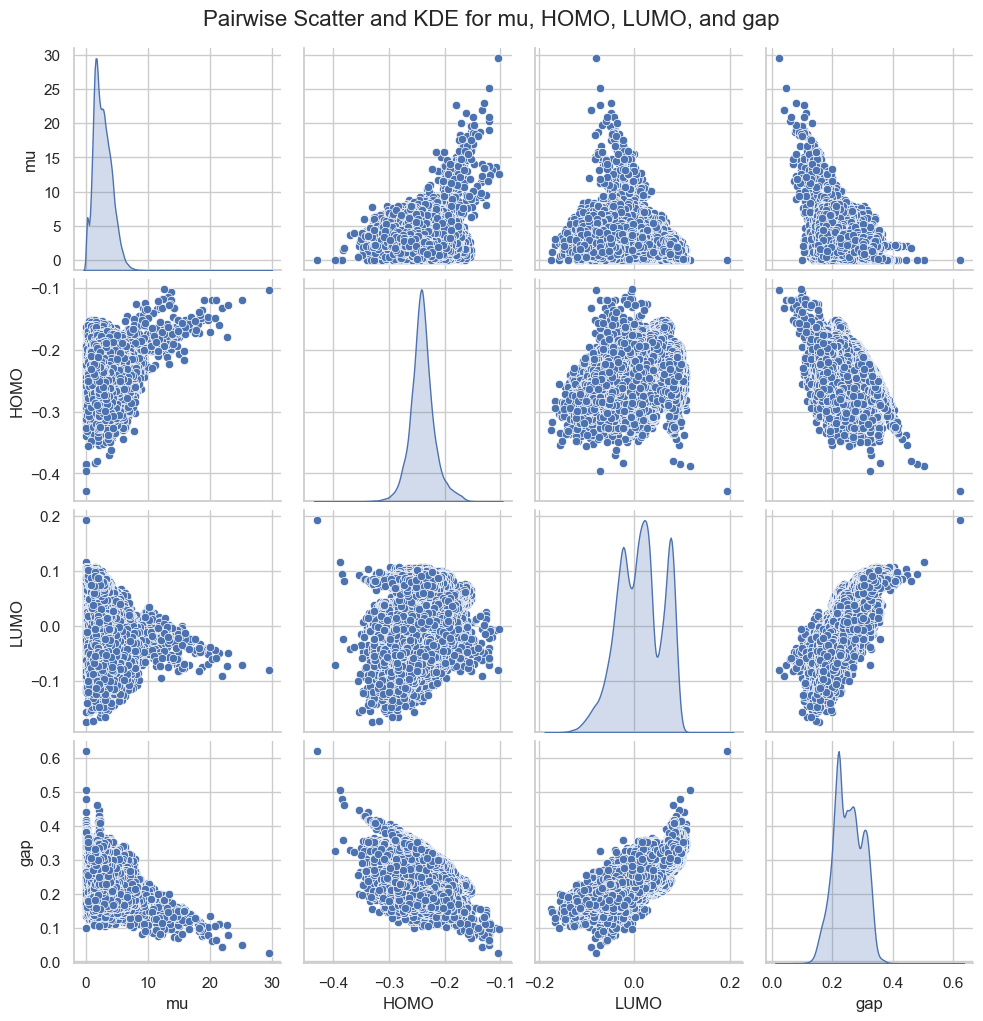

In [32]:
# Pairplot of targets 
pairplot_fig = sns.pairplot(df[targets], kind="scatter", diag_kind="kde")
pairplot_fig.fig.suptitle("Pairwise Scatter and KDE for mu, HOMO, LUMO, and gap", y=1.02, fontsize=16)
pairplot_fig.savefig(f"{output_dir}/pairplot_targets_gap.png", dpi=300)
plt.show()
plt.close()

C:\Users\tkasiror\AppData\Local\Temp\ipykernel_34284\3761264942.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations[top_corr_features], y=top_corr_features, palette="viridis")


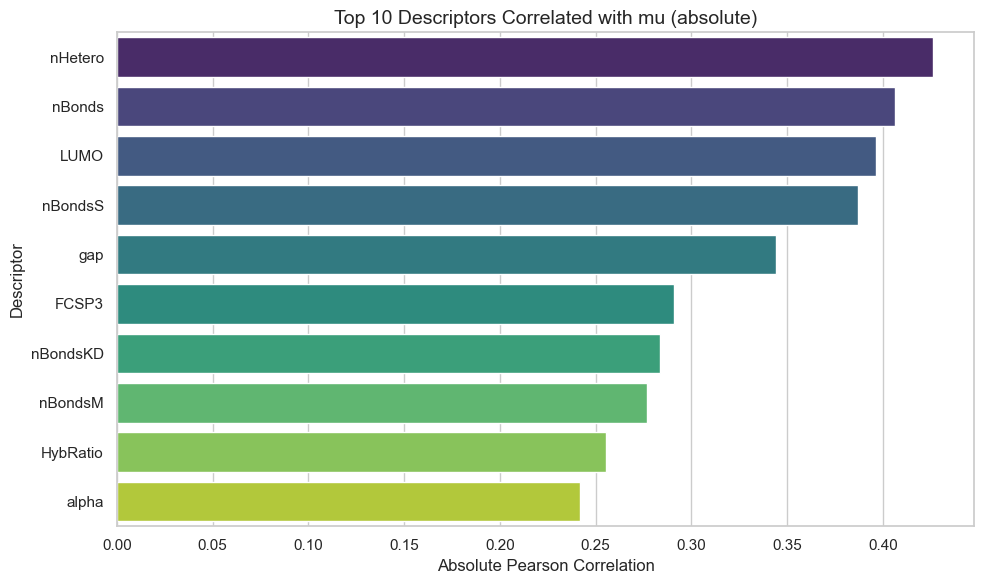

In [33]:
# --- 3. Descriptor Correlation Summary ---
# Calculate correlations with mu
correlations = df.corr(numeric_only=True)["mu"].abs().sort_values(ascending=False)
top_corr_features = correlations.index[1:11]  # exclude mu itself

plt.figure()
sns.barplot(x=correlations[top_corr_features], y=top_corr_features, palette="viridis")
plt.title("Top 10 Descriptors Correlated with mu (absolute)", fontsize=14)
plt.xlabel("Absolute Pearson Correlation", fontsize=12)
plt.ylabel("Descriptor", fontsize=12)
plt.tight_layout()
plt.savefig(f"{output_dir}/top10_mu_correlation.png", dpi=300)
plt.show()
plt.close()

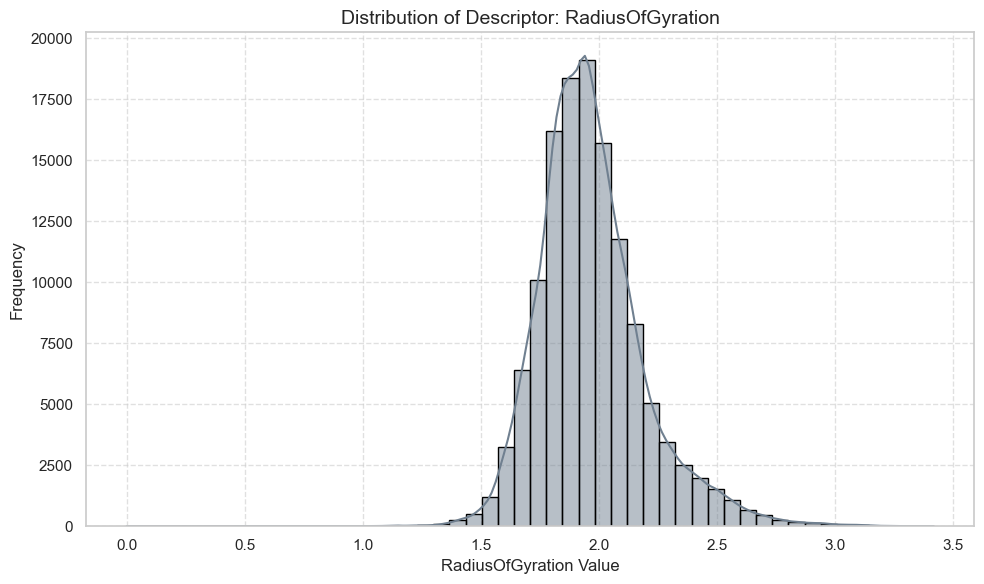

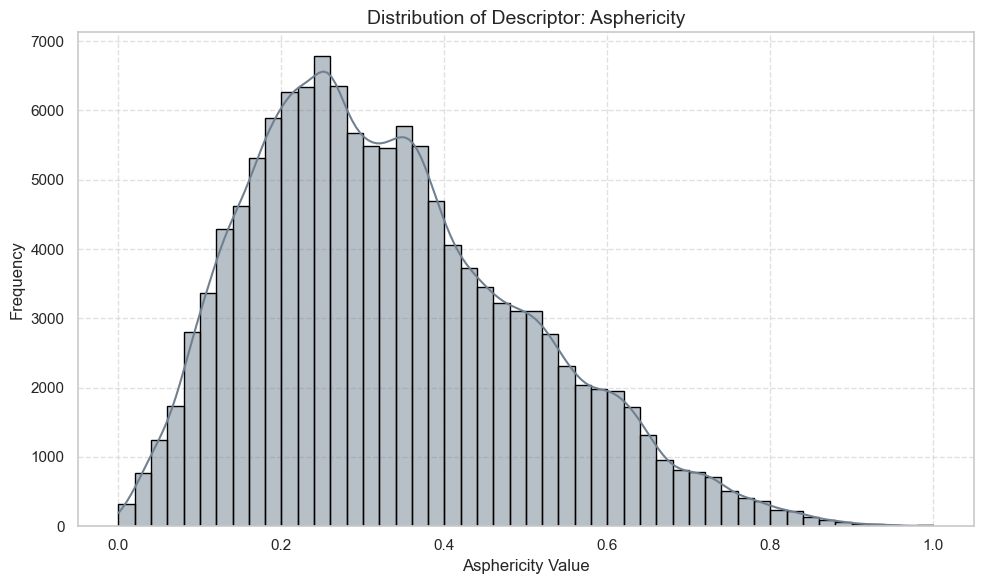

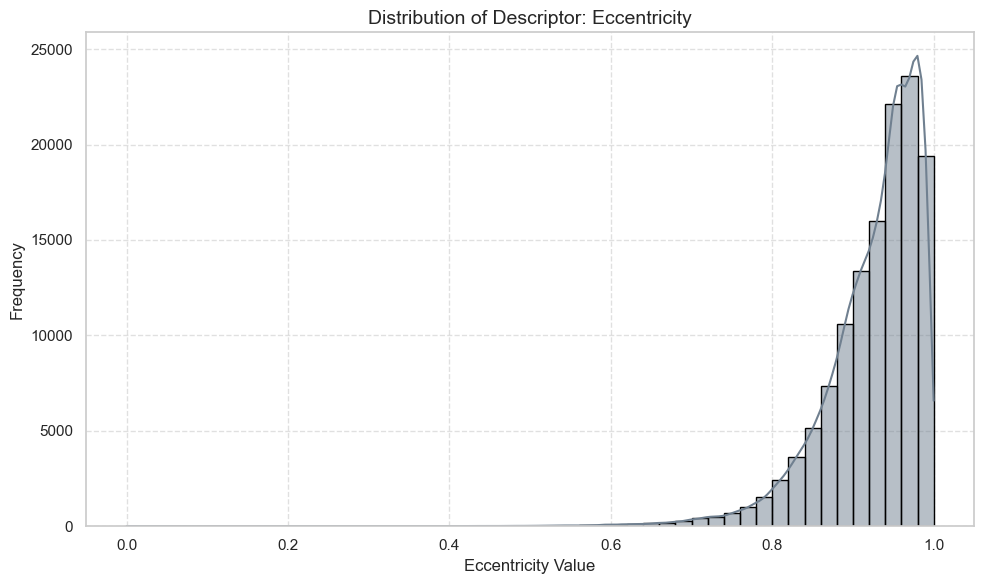

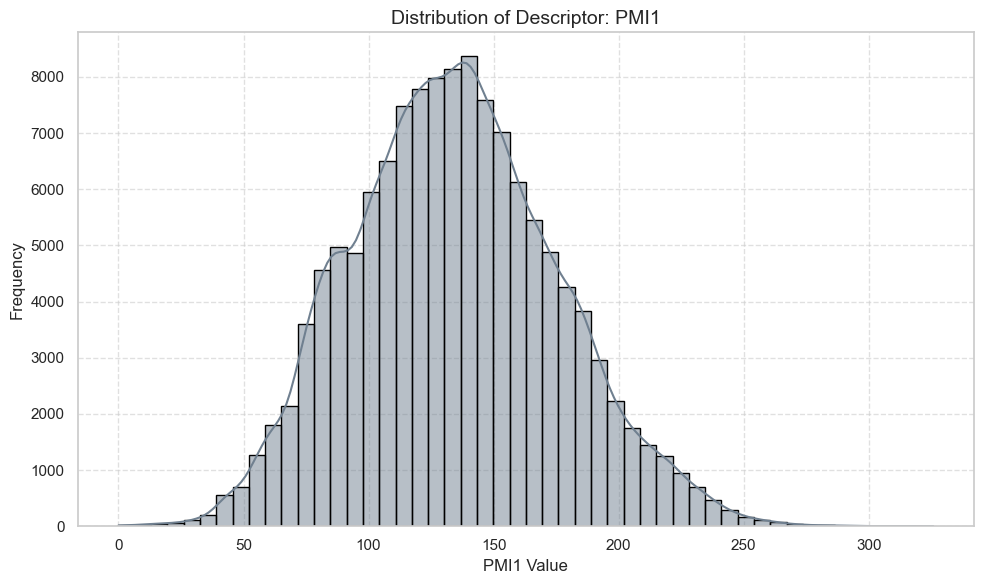

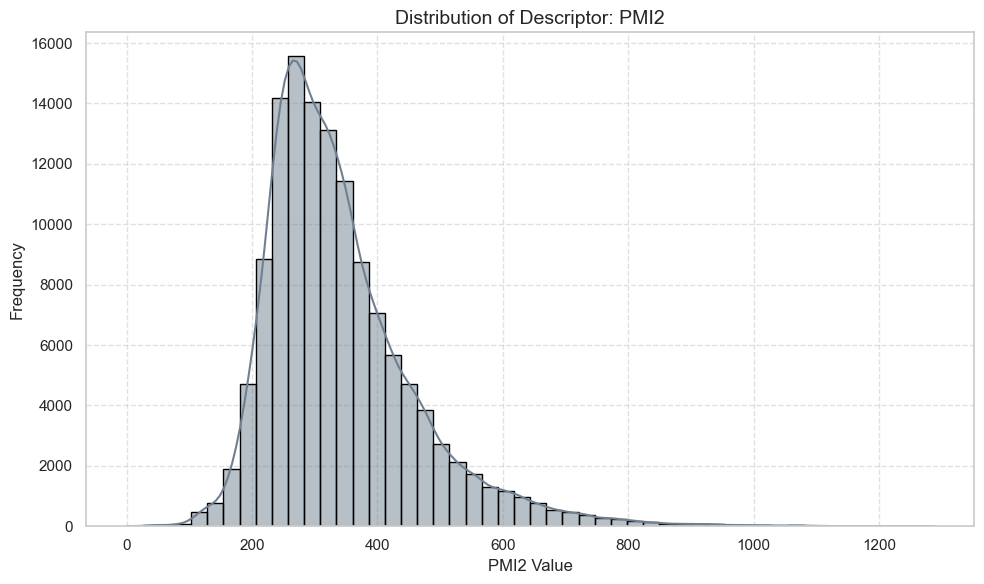

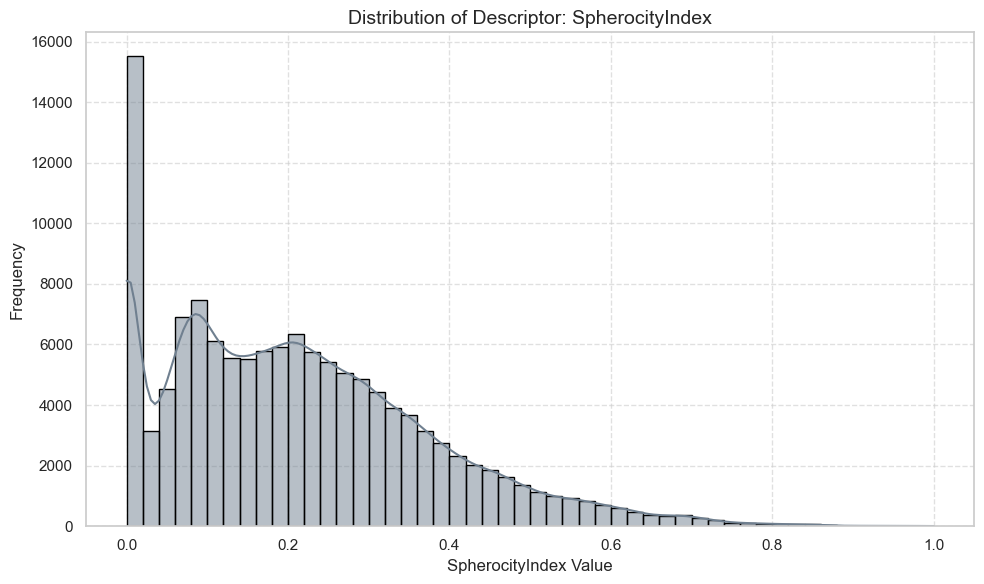

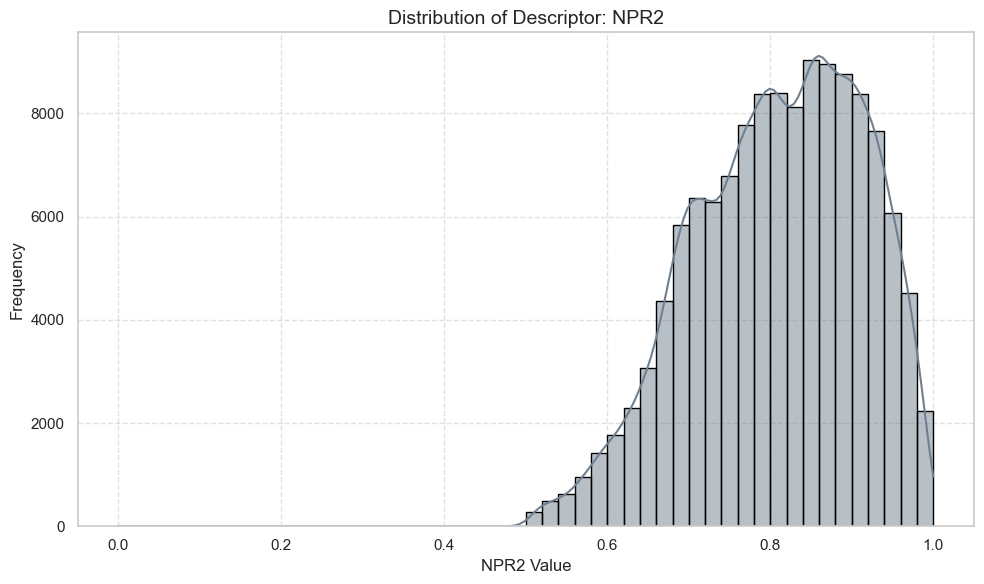

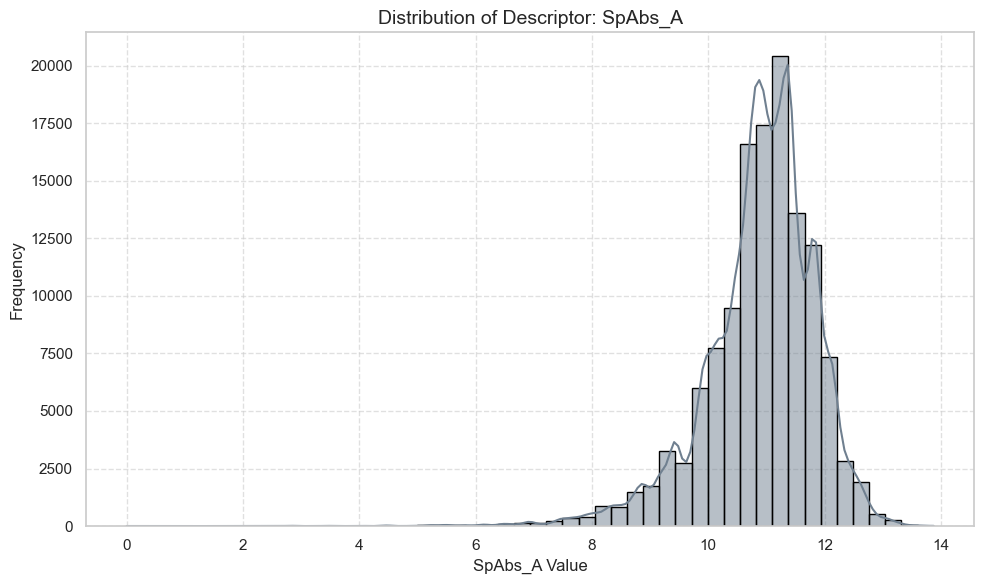

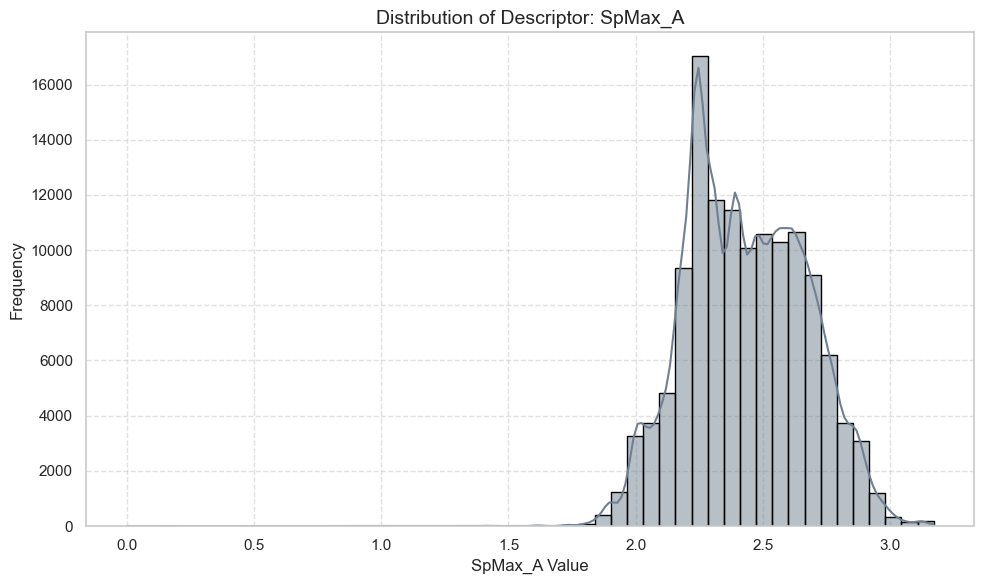

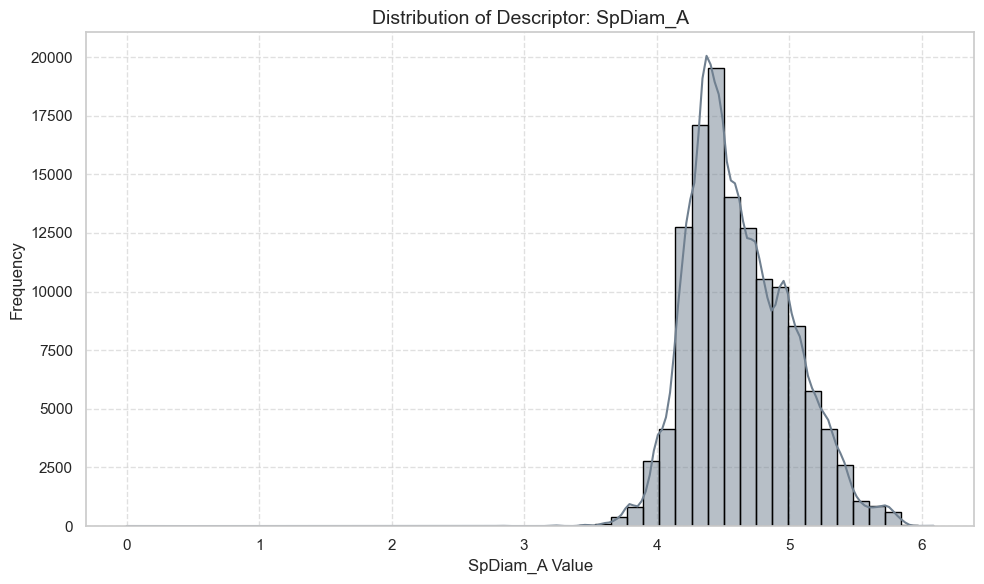

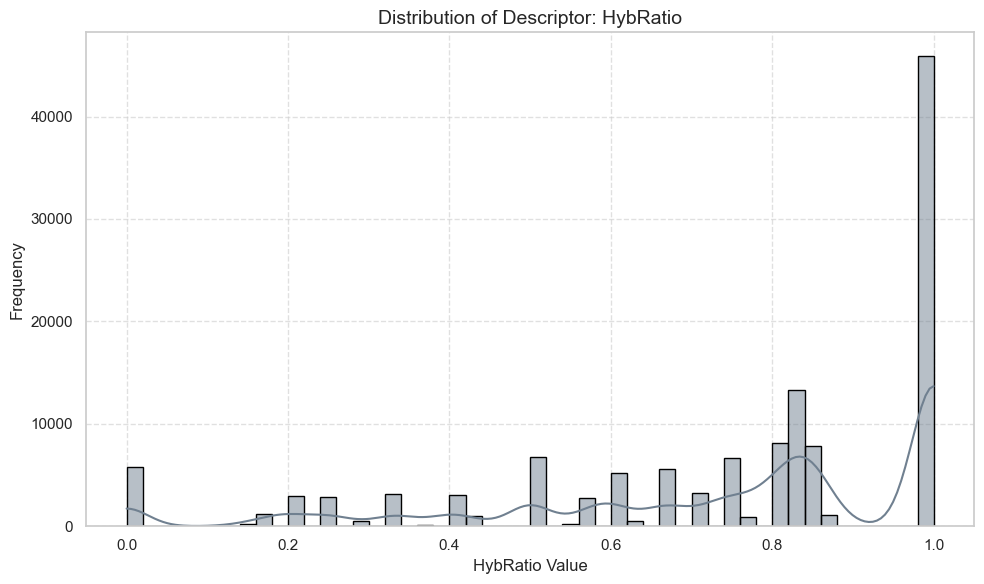

In [34]:
# --- 4. Descriptor Distribution Checks ---
# Pick some example descriptors
example_descriptors = [
    'RadiusOfGyration', 'Asphericity', 'Eccentricity', 'PMI1', 'PMI2',
    'SpherocityIndex', 'NPR2', 'SpAbs_A', 'SpMax_A', 'SpDiam_A', 'HybRatio'
]

for desc in example_descriptors:
    plt.figure()
    sns.histplot(df[desc], kde=True, bins=50, color="slategray", edgecolor="black")
    plt.title(f"Distribution of Descriptor: {desc}", fontsize=14)
    plt.xlabel(f"{desc} Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/descriptor_distribution_{desc}.png", dpi=300)
    plt.show()
    plt.close()



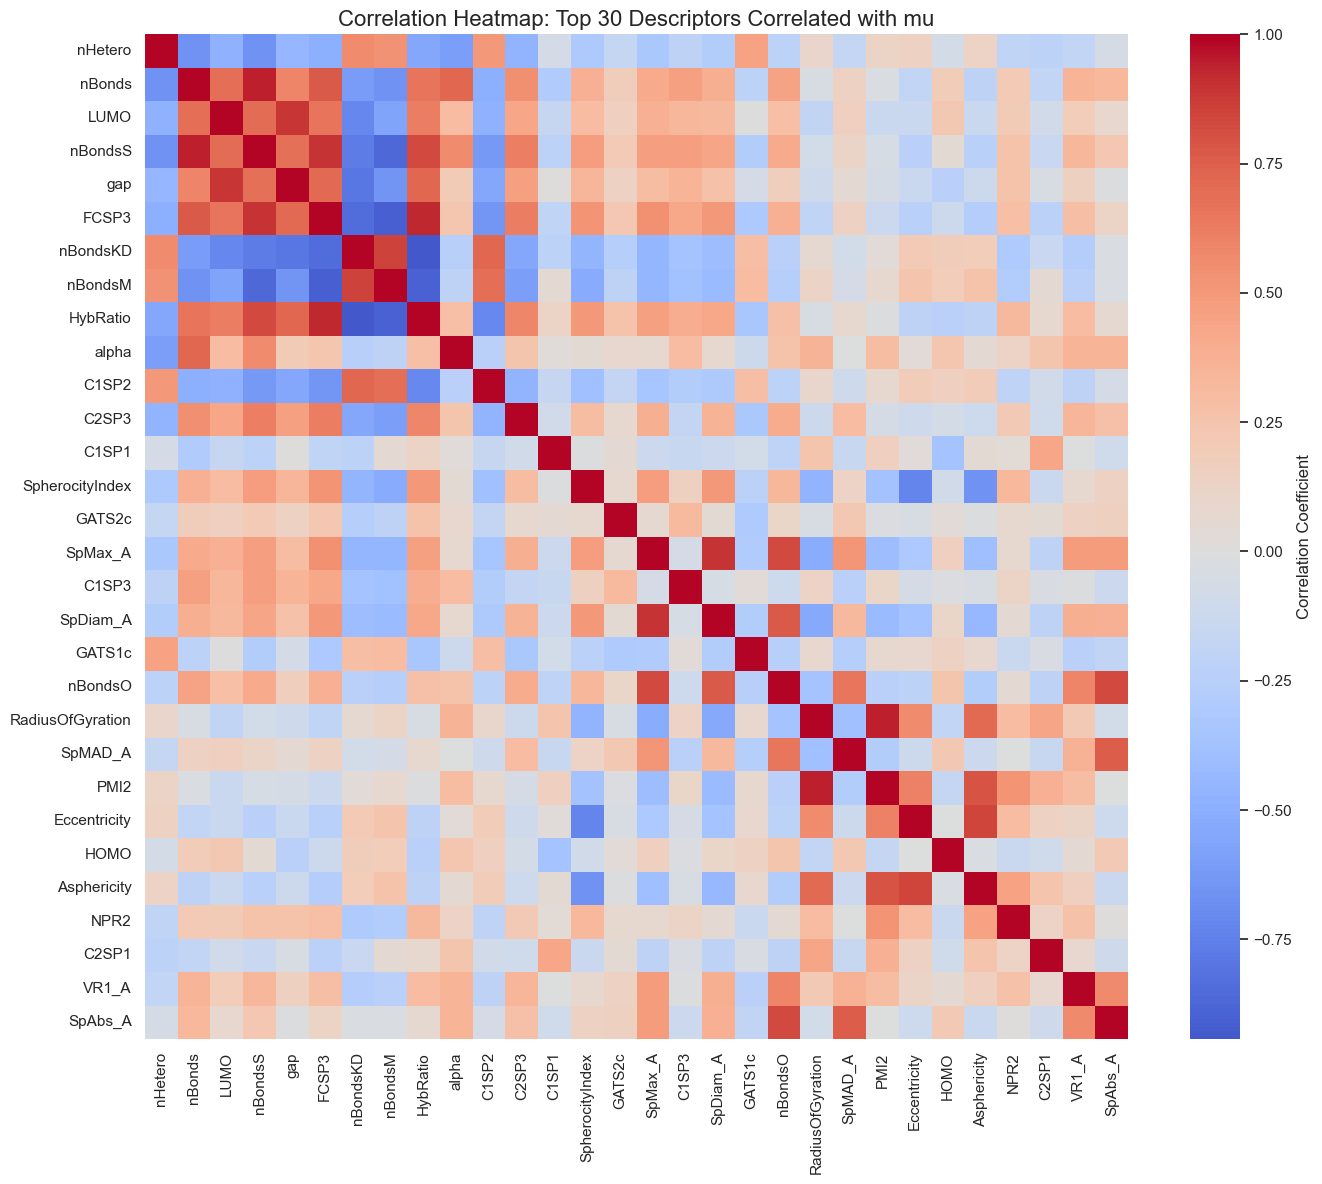

In [35]:
# --- 5. Feature Correlation Heatmap ---
# Take top 30 descriptors most correlated with mu
top_30 = correlations.index[1:31]
corr_matrix = df[top_30].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap: Top 30 Descriptors Correlated with mu", fontsize=16)
plt.tight_layout()
plt.savefig(f"{output_dir}/heatmap_top30_mu_corr.png", dpi=300)
plt.show()
plt.close()

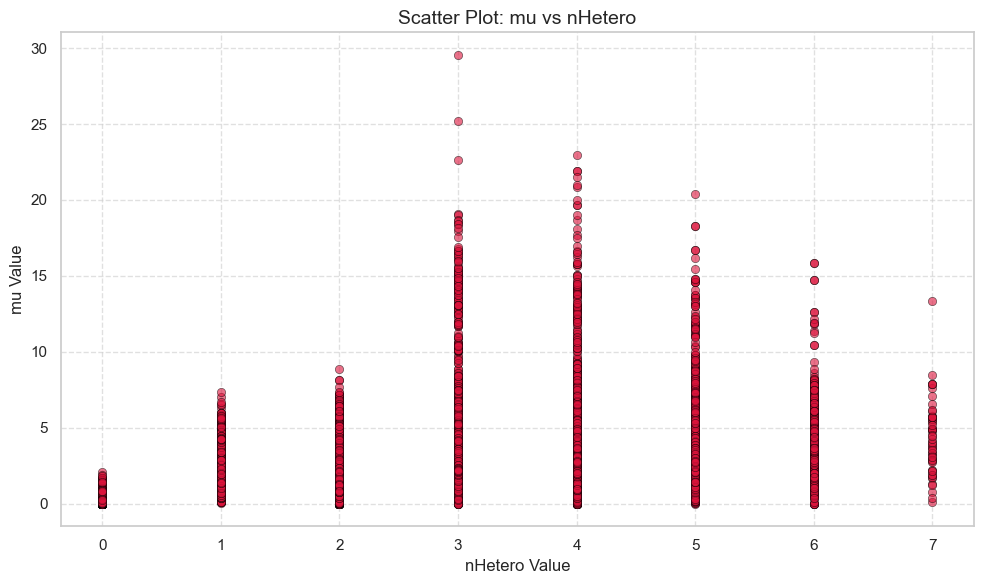

In [36]:
# --- 6. Outlier Check (Scatter mu vs top correlated feature) ---
top_feature = top_corr_features[0]

plt.figure()
sns.scatterplot(x=df[top_feature], y=df["mu"], alpha=0.6, color="crimson", edgecolor="black")
plt.title(f"Scatter Plot: mu vs {top_feature}", fontsize=14)
plt.xlabel(f"{top_feature} Value", fontsize=12)
plt.ylabel("mu Value", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig(f"{output_dir}/scatter_mu_vs_{top_feature}.png", dpi=300)
plt.show()
plt.close()